---
#**Q1. Explain the assumptions required to use ANOVA and provide examples of violations that could impact the validity of the results.**

Assumptions of ANOVA (Analysis of Variance):
1. Independence: The observations within each group are independent of each other.
2. Normality: The residuals (the differences between the observed and predicted values) are normally distributed.
3. Homogeneity of Variance (Homoscedasticity): The variance of the residuals is constant across all levels of the independent variable(s).

Examples of Violations:
1. Independence: Violation could occur if data points within groups are correlated, such as repeated measures or hierarchical data.
2. Normality: Violation could occur if the residuals do not follow a normal distribution, which might happen if the sample size is too small or if outliers are present.
3. Homogeneity of Variance: Violation could occur if the variance of the residuals is not constant across groups, which might happen if the groups have significantly different sample sizes or if there are outliers present.

Violation of these assumptions can lead to inaccurate results and conclusions from ANOVA analysis.

---
#**Q2. What are the three types of ANOVA, and in what situations would each be used?**

Three types of ANOVA:
1. One-Way ANOVA: Compares means across two or more independent groups (levels) of a single categorical independent variable.
2. Two-Way ANOVA: Analyzes the interaction effects between two independent variables (factors) on a dependent variable.
3. N-Way ANOVA: Extends the concept of ANOVA to analyze the interaction effects between multiple independent variables on a dependent variable.

Each type of ANOVA is used in different situations based on the research design and the number of independent variables involved.

---
#**Q3. What is the partitioning of variance in ANOVA, and why is it important to understand this concept?**

Partitioning of variance in ANOVA involves decomposing the total variance observed in the data into different components:
1. Total Sum of Squares (SST): The total variability observed in the dependent variable.
2. Explained Sum of Squares (SSE): The variability explained by the independent variable(s) or factors.
3. Residual Sum of Squares (SSR): The unexplained variability, also known as error variance, left over after accounting for the effects of the independent variable(s).

Understanding this concept is important because it allows researchers to assess the relative importance of the independent variable(s) in explaining the variability in the dependent variable. It also helps in interpreting the results of ANOVA and identifying sources of variation in the data.

---
#**Q4. How would you calculate the total sum of squares (SST), explained sum of squares (SSE), and residual sum of squares (SSR) in a one-way ANOVA using Python?**

In [6]:
import numpy as np
import scipy.stats as stats

# Sample data
group1 = [10, 12, 15, 14, 16]
group2 = [18, 20, 22, 19, 21]
group3 = [25, 28, 24, 27, 26]

# Calculate means
grand_mean = np.mean([group1 + group2 + group3])
mean_group1 = np.mean(group1)
mean_group2 = np.mean(group2)
mean_group3 = np.mean(group3)

# Calculate total sum of squares (SST)
SST = np.sum((np.concatenate([group1, group2, group3]) - grand_mean) ** 2)

# Calculate explained sum of squares (SSE)
SSE = np.sum((np.array(group1) - mean_group1) ** 2) + np.sum((np.array(group2) - mean_group2) ** 2) + np.sum((np.array(group3) - mean_group3) ** 2)

# Calculate residual sum of squares (SSR)
SSR = SST - SSE

# Calculate the total sum of squares (SST), explained sum of squares (SSE), and residual sum of squares (SSR)
print("Total Sum of Squares (SST):", SST)
print("Explained Sum of Squares (SSE):", SSE)
print("Residual Sum of Squares (SSR):", SSR)



Total Sum of Squares (SST): 440.4
Explained Sum of Squares (SSE): 43.2
Residual Sum of Squares (SSR): 397.2


---
#**Q5. In a two-way ANOVA, how would you calculate the main effects and interaction effects using Python?**

In [8]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Define a sample dataset
data = pd.DataFrame({
    'dependent_variable': [10, 15, 20, 25, 30, 12, 18, 22, 28, 35],
    'factor1': ['A'] * 5 + ['B'] * 5,  # Example levels for factor 1
    'factor2': ['X', 'Y'] * 5  # Example levels for factor 2
})

# Fit the ANOVA model
model = ols('dependent_variable ~ C(factor1) + C(factor2) + C(factor1) * C(factor2)', data=data).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Extract main effects and interaction effects
main_effects = anova_table['sum_sq'][:-1]
interaction_effect = anova_table['sum_sq'][-1]

# Print the results
print("Main Effects:", main_effects)
print("Interaction Effect:", interaction_effect)


Main Effects: C(factor1)               2.160000e+01
C(factor2)               1.305668e-28
C(factor1):C(factor2)    2.187906e-28
Name: sum_sq, dtype: float64
Interaction Effect: 566.0


---
#**Q6. Suppose you conducted a one-way ANOVA and obtained an F-statistic of 5.23 and a p-value of 0.02. What can you conclude about the differences between the groups, and how would you interpret these results?**
In this scenario:
- The F-statistic of 5.23 indicates that there is some variation between the group means.
- The p-value of 0.02 is less than the significance level (e.g., 0.05), indicating that there is sufficient evidence to reject the null hypothesis of no difference between the group means.

Therefore, we conclude that there are statistically significant differences between at least two of the group means. However, further post-hoc tests may be needed to determine which specific groups differ from each other.

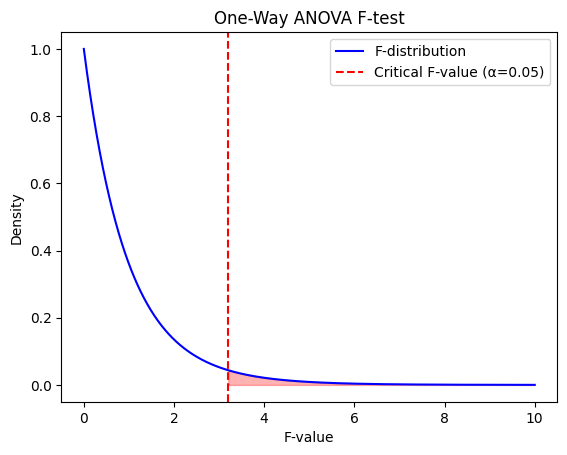

In [10]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Given values
F_statistic = 5.23
alpha = 0.05  # Significance level

# Define degrees of freedom
k = 3  # Number of groups
n = 50  # Total number of observations

# Plotting the F-distribution with degrees of freedom
df_between = k - 1  # degrees of freedom between groups
df_within = n - k   # degrees of freedom within groups
x = np.linspace(0, 10, 1000)
y = stats.f.pdf(x, df_between, df_within)

# Plot the F-distribution
plt.plot(x, y, 'b-', label='F-distribution')

# Plot the critical F-value
critical_f_value = stats.f.ppf(1 - alpha, df_between, df_within)
plt.axvline(x=critical_f_value, color='r', linestyle='--', label=f'Critical F-value (α={alpha})')

# Fill the area beyond the critical F-value
plt.fill_between(x, y, where=(x >= critical_f_value), color='red', alpha=0.3)

# Add labels and legend
plt.xlabel('F-value')
plt.ylabel('Density')
plt.title('One-Way ANOVA F-test')
plt.legend()
plt.show()
